# **Fuzzy Inference - Choke Adjustment I**

In [1]:
!pip install scikit-fuzzy

     |████████████████████████████████| 993 kB 5.2 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=60e72997bb6458eb291c2750118a33211e6bdfa9610fd0bfea15a28cffd79ec5
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


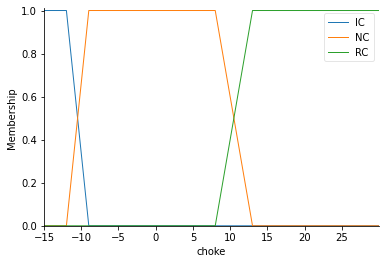

In [2]:
import numpy as np
import skfuzzy 
from skfuzzy import control
# Define input variable for a fuzzy control system
THP=control.Antecedent(np.arange(70, 541, 1), 'THP')
GLR=control.Antecedent(np.arange(0, 28, 1), 'GLR')
q=control.Antecedent(np.arange(60, 650, 1), 'q')
choke=control.Consequent(np.arange(-15,30,0.01), 'choke')
# Create trapezoidal fuzzy membership functions
THP['low']=skfuzzy.trapmf(THP.universe, [70, 70, 80, 120])
THP['med']=skfuzzy.trapmf(THP.universe, [80, 120, 230, 300])
THP['hi']=skfuzzy.trapmf(THP.universe, [230, 300, 540, 540])
GLR['low']=skfuzzy.trapmf(GLR.universe, [0, 0, 2, 4])
GLR['med']=skfuzzy.trapmf(GLR.universe, [2, 4, 7, 10])
GLR['hi']=skfuzzy.trapmf(GLR.universe, [7, 10, 27, 27])
q['low']=skfuzzy.trapmf(q.universe,[60, 60, 90, 160])
q['med']=skfuzzy.trapmf(q.universe, [90, 160, 260, 330])
q['hi']=skfuzzy.trapmf(q.universe, [260, 330, 650, 650])
choke['IC']=skfuzzy.trapmf(choke.universe,[-15, -15, -12,-9])
choke['NC']=skfuzzy.trapmf(choke.universe, [-12, -9, 8, 13])
choke['RC']=skfuzzy.trapmf(choke.universe, [8,13, 30, 30])
# Plot Membership Functions
choke.view()

10.111101031095357


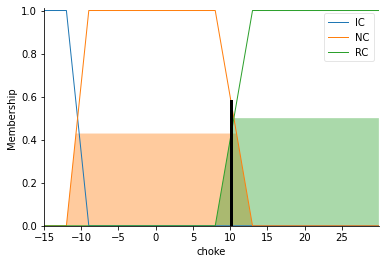

In [3]:
# Defining Rule in a fuzzy control system to connect inputs to choke
#control decision
rule1=control.Rule(THP['low'] & GLR['low'] & q['low'], choke['IC'])
rule2=control.Rule(THP['low'] & GLR['med'] & q['low'], choke['IC'])
rule3=control.Rule(THP['low'] & GLR['hi'] & q['low'], choke['IC'])
rule4=control.Rule(THP['med'] & GLR['low'] & q['med'], choke['NC'])
rule5=control.Rule(THP['med'] & GLR['med'] & q['med'], choke['NC'])
rule6=control.Rule(THP['med'] & GLR['hi'] & q['med'], choke['NC'])
rule7=control.Rule(THP['hi'] & GLR['low'] & q['hi'], choke['RC'])
rule8=control.Rule(THP['hi'] & GLR['med'] & q['hi'], choke['RC'])
rule9=control.Rule(THP['hi'] & GLR['hi'] & q['hi'], choke['RC'])
rule10=control.Rule(THP['hi'] & GLR['low'] & q['low'], choke['IC'])
#Additional rules for 3D plot
rule11=control.Rule(THP['low'] & GLR['hi'] & q['hi'], choke['NC'])
rule12=control.Rule(THP['med'] & GLR['med'] & q['low'], choke['IC'])
rule13=control.Rule(THP['hi'] & GLR['med'] & q['low'], choke['NC'])
rule14=control.Rule(THP['hi'] & GLR['med'] & q['med'], choke['NC'])
rule15=control.Rule(THP['med'] & GLR['med'] & q['hi'], choke['RC'])
rule16=control.Rule(THP['low'] & GLR['med'] & q['med'], choke['IC'])
rule17=control.Rule(THP['low'] & GLR['med'] & q['hi'], choke['NC'])
# Define base classes for Fuzzy control system with 10 rules
choke_control=control.ControlSystem([rule1, rule2, rule3, rule4,
rule5, rule6, rule7, rule8, rule9, rule10,rule11,rule12,rule13,rule14,
rule15,rule16,rule17])
#Result computing from control system
choking=control.ControlSystemSimulation(choke_control)
# Provide inputs to the ControlSystem using input
choking.input['THP']=265
choking.input['GLR']=20
choking.input['q']=300
#compute the result of fuzzy system
choking.compute()
print (choking.output['choke'])
#plot the rules and final decision
choke.view(sim=choking)

Text(0.5, 0, 'Choke Adjustment (-%)')

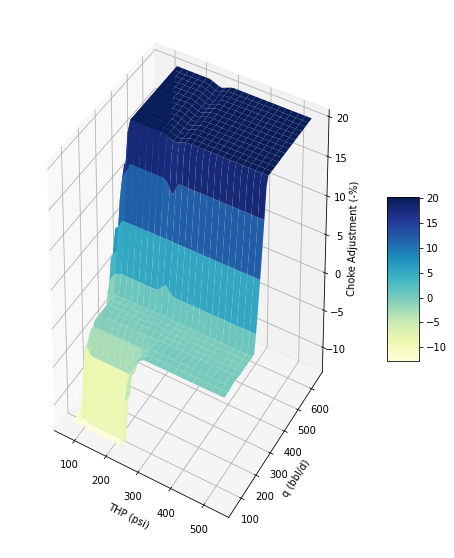

In [4]:
n=50
THP_highres=np.linspace(70, 540, n+1)
q_highres=np.linspace(60, 640, n+1)
x, y=np.meshgrid(THP_highres, q_highres)
z=np.zeros_like(x)
# Loop through the input values to calculate the corresponding control
#values
for i in range(n+1):
     for j in range(n+1):
          choking.input['THP']=x[i, j]
          choking.input['GLR']=5
          choking.input['q']=y[i, j]
          choking.compute()
          z[i, j]=choking.output['choke']
# Plot the 3D plot
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure(figsize=(8, 10))
ax=fig.add_subplot(111, projection='3d')
surf=ax.plot_surface(x, y, z, cmap='YlGnBu', linewidth=0.5)
fig.colorbar(surf, ax=ax, shrink=0.3,aspect=5)
ax.set_xlabel('THP (psi)')
ax.set_ylabel('q (bbl/d)')
ax.set_zlabel('Choke Adjustment (-%)')